# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└───data
│   │
│   └───raw
│   |   │   
│   │   └───data_<TASK>
│   │   │   
│   │   └───<MONKEY>_<YYYYMMDD>_g<d>             
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│   │ 
│   └───processed
│   │   │   
│   │   └───data_<TASK>
│   │ 
│   └───_fractals
│       │   
│       └─── <YYYYMMDD>
│
└─── tasks
    │
    └───<EXPERIMENT>
        │   
        └─── <TASK>  
            │   
            └───<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [8]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice
Target path is:
  data_Probabilistic_Reward_Airpuff_Choice/
Searching for Bear for 231101
  Moving : 231101_Bear_choice.h5
  Moved  : 231101_Bear_choice.h5
  Total number of files moved: 1
Fractal folder is: 20231101
  Copied fractal folder to all fractals folder
Done.


In [9]:
%load_ext autoreload
%autoreload 2
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Choice' # Probabalistic_Airpuff_4x2 | Probabilistic_Reward_Airpuff_5x2 | Probabilistic_Reward_Airpuff_Choice

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
  Number of Total Files  : 142
  Monkey: Bear
    Number of Bear Files : 58
    Earliest Date    : 230608
    Most Recent Date : 231101
  Monkey: Aragorn
    Number of Aragorn Files : 70
    Earliest Date    : 230523
    Most Recent Date : 231031
Video Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos
Pulling '.h5' files...
  Complete: 134 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [12]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2023-11-01' #@param {type:"date"}
end_date = '2023-11-01' #@param {type:"date"}
monkey_input = 'Bear' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  231101_Bear_choice.h5 - Completed
Converting .h5 to python:
  <HDF5 file "231101_Bear_choice.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 1439
  Choice task detected.
Parsing session data...


  0%|          | 0/1439 [00:00<?, ?it/s]

  Complete.
    Correct trials: 400
    Errored trials: 1039
    Session Length:  02:04:31
Parsing camera data...
  No camera data attached to ML file.
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-122.292,-33.377)
  Max Values (X,Y): (96.618,114.474)
  Reward Mag: 1.0
    Reward Drops: 14.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.5
    Reward Drops: 6.0
    Reward Frequency: 1.0
    Reward Length: 150.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...
  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monke

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [5]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num  subject  trial_num  block  condition  correct  error   
0  231031            0  Aragorn          1      1          1        1      0  \
2  231031            0  Aragorn          3      1          1        1      0   
4  231031            0  Aragorn          5      1          1        1      0   
5  231031            0  Aragorn          6      1          1        1      0   
8  231031            0  Aragorn          9      1          1        1      0   

   error_type                            behavioral_code_markers   
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
2           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
8           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_1 x_1_pos   
0  [5.49529999261722, 208.792400022503, 294.81980...     _fractal_B   [0.0]  \
2  [1499.1094000288285, 1614.6928000380285, 1647....     _fractal_A   [0.0]   
4  [1466.7943000094965, 1589.405600039754, 1639.2...     _fractal_E   [0.0]   
5  [1497.9149000137113, 1569.3032999988645, 1604....     _fractal_A   [0.0]   
8  [1499.6546999900602, 1571.310299972538, 1605.3...     _fractal_C   [0.0]   

  y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0   [0.0]     _fractal_B   [0.0]   [0.0]         1            1.0  \
2   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   
4   [0.0]     _fractal_E   [0.0]   [0.0]         0            0.0   
5   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   
8   [0.0]     _fractal_C   [0.0]   [0.0]         0            0.0   

   reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
0           0.5             4.0            150.0         0            0.0  \
2           1.0            12.0            200.0         0            0.0   
4           0.0             0.0              0.0         0            0.0   
5           1.0            12.0            200.0         0            0.0   
8           0.0             0.0              0.0         0            0.0   

   reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
0           0.0          0             0.0            0.0          0  \
2           0.0          0             0.0            0.0          0   
4           0.0          0             0.0            0.0          0   
5           0.0          0             0.0            0.0          0   
8           0.0          1             1.0            0.5          0   

   airpuff_prob_2  airpuff_mag_2   
0             0.0            0.0  \
2             0.0            0.0   
4             0.0            0.0   
5             0.0            0.0   
8             0.0            0.0   

                                               eye_x   
0  [1.7723264707999047, 1.7723264707999047, 1.740...  \
2  [5.440327352089723, 5.440327352089723, 5.43944...   
4  [125.32471435482087, 125.32471435482087, 125.3...   
5  [125.32471435482087, 125.32471435482087, 125.3...   
8  [11.185933422268949, 11.185933422268949, 11.19...   

                                               eye_y   
0  [1.5408726004522884, 1.5408726004522884, 1.489...  \
2  [6.802747777787434, 6.802747777787434, 6.76760...   
4  [136.0106178169427, 136.0106178169427, 136.010...   
5  [136.0106178169427, 136.0106178169427, 136.010...   
8  [22.474041819100762, 22.474041819100762, 22.47...   

                                           eye_pupil   
0  [8601.0, 8599.0, 8599.0, 8599.0, 8599.0, 8599....  \
2  [6712.0, 6712.0, 6713.0, 6714.0, 6714.0, 6714....   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8  [7277.0, 7277.0, 7276.0, 7276.0, 7254.0, 7254....   

                                                lick   
0  [0.010856925924411315, 0.00625334477198649

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

231101
  perf_by_fractal.png saved.


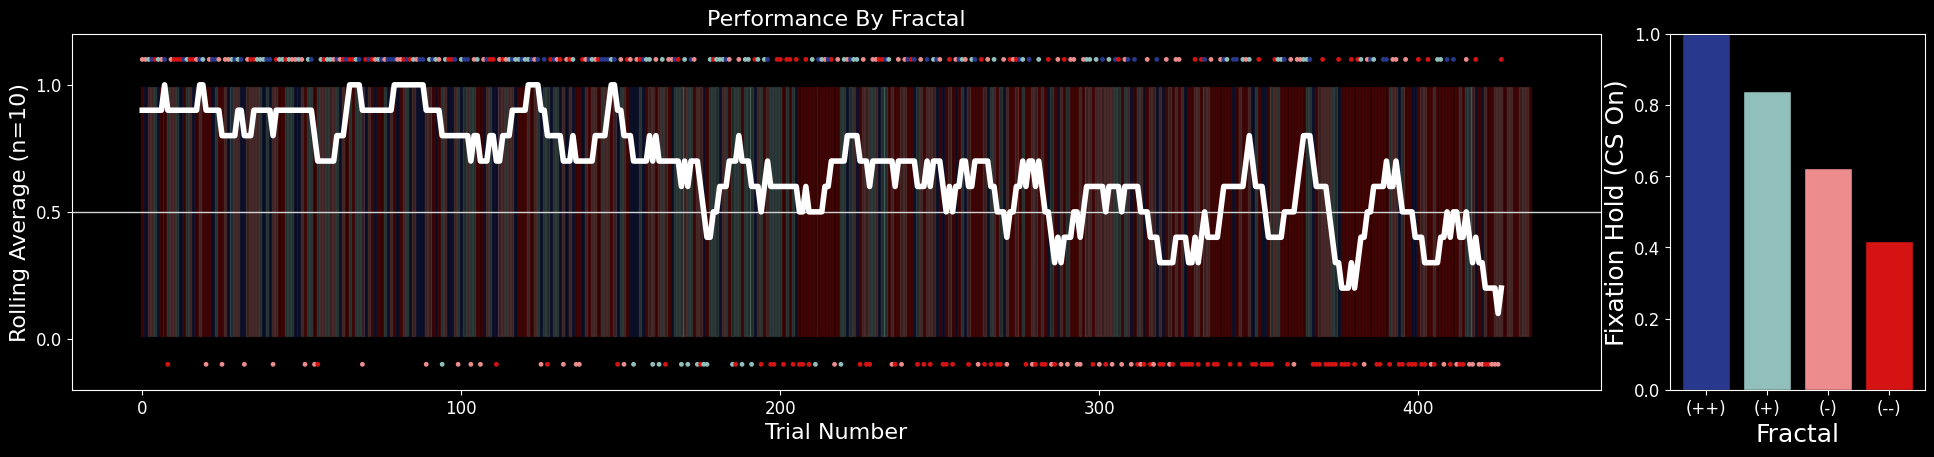

  session_latency.png saved.


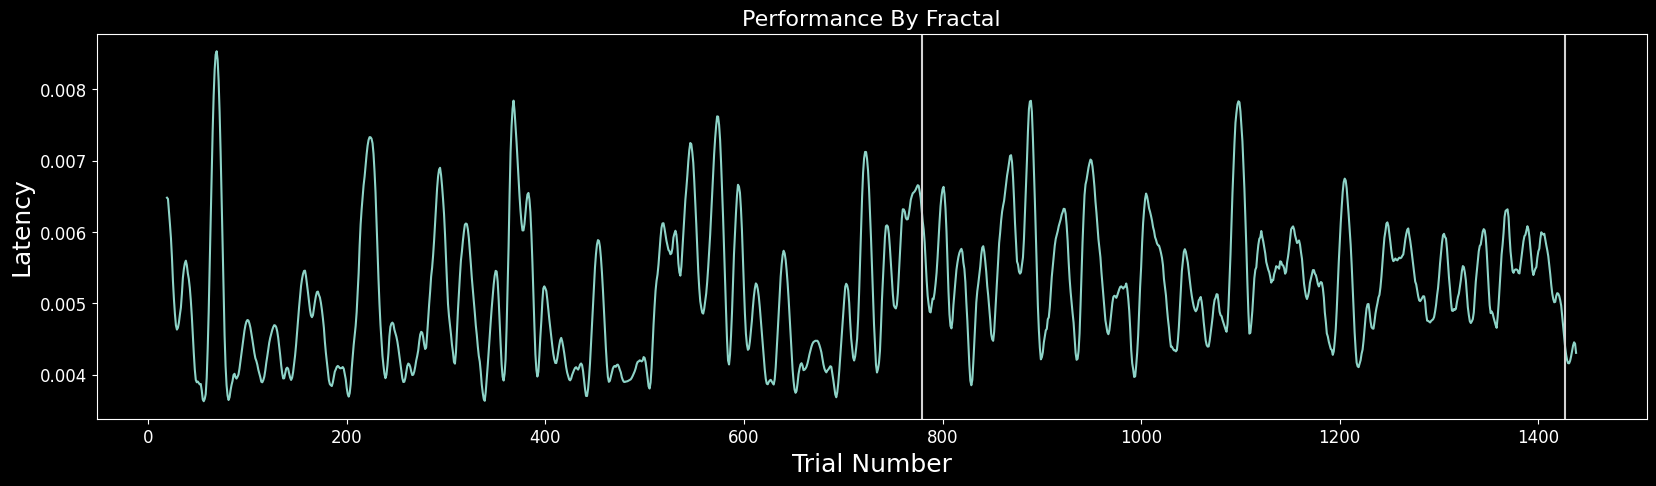

  epoch_hist.png saved.


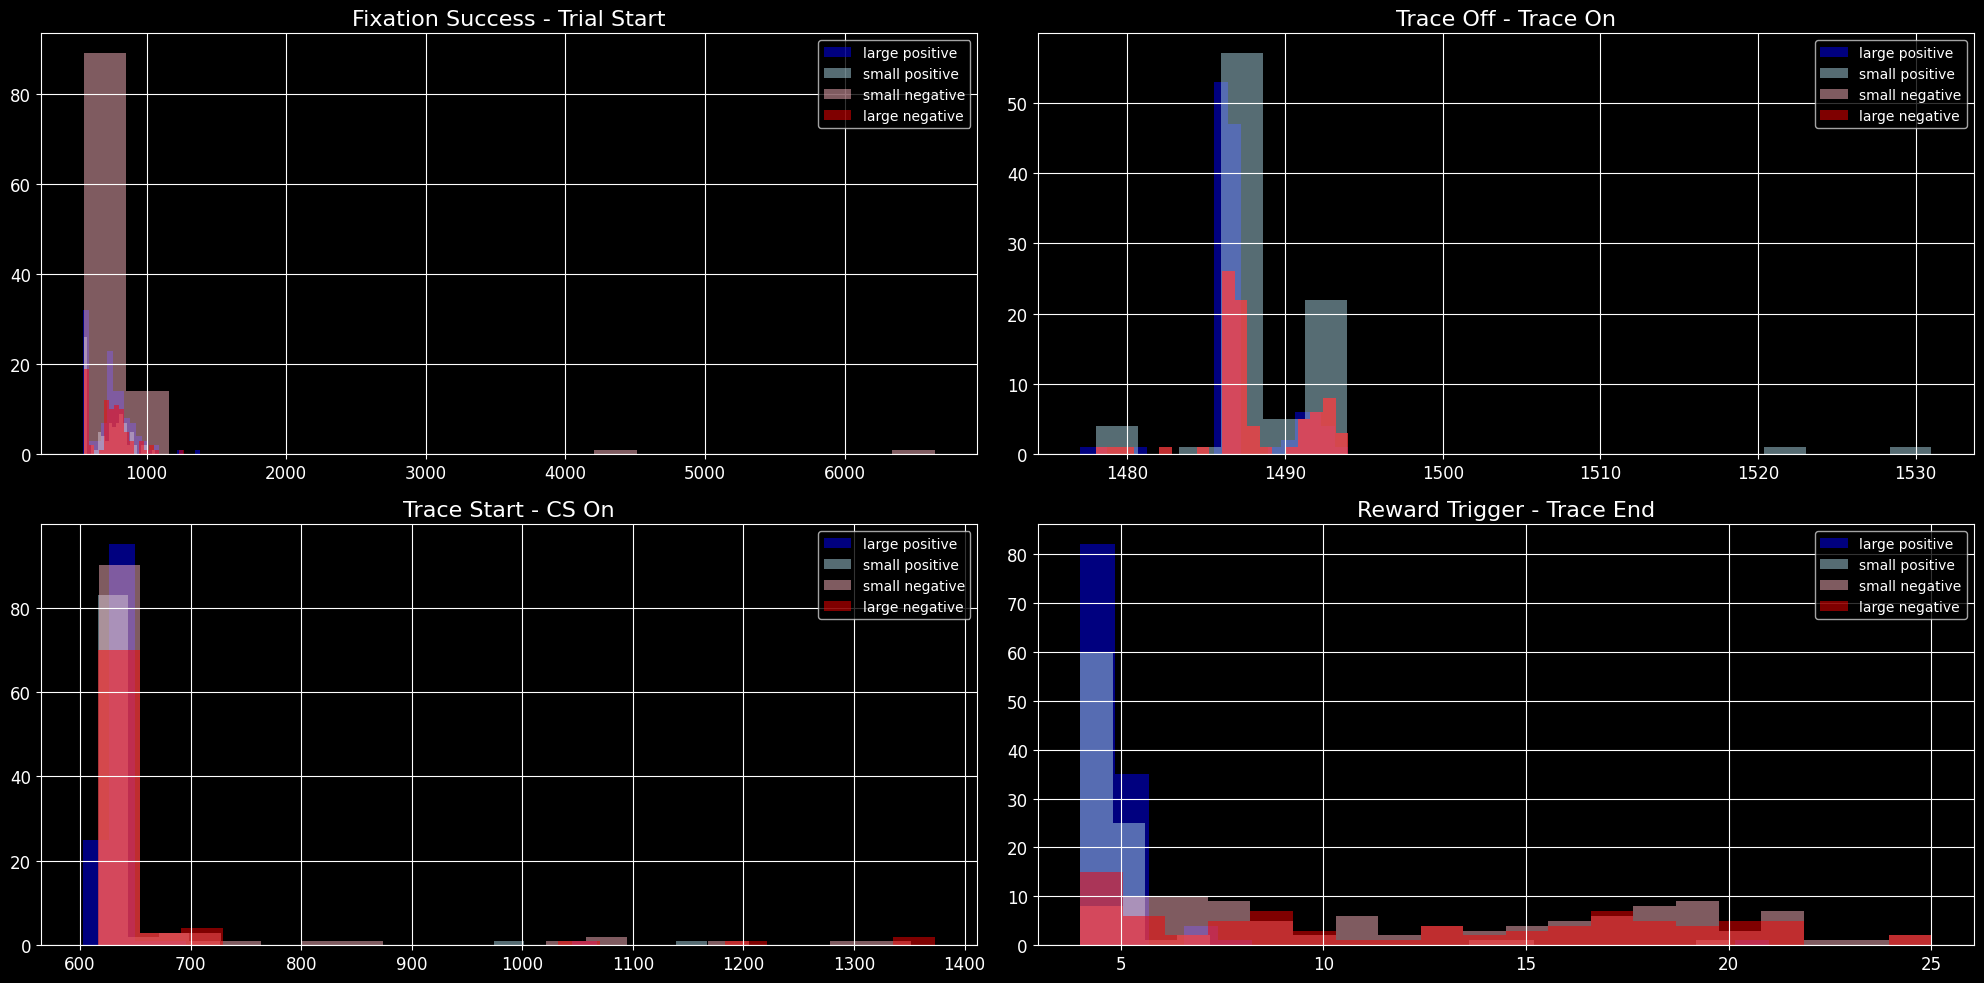

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: 0.028 | Blink Correlation: nan
  Valence 0.5: Lick Correlation: -0.176 | Blink Correlation: 0.065
  Valence -0.5: Lick Correlation: 0.217 | Blink Correlation: 0.102
  Valence -1.0: Lick Correlation: 0.139 | Blink Correlation: 0.041
Block: 2
  Valence 1.0: Lick Correlation: -0.063 | Blink Correlation: 0.335
  Valence 0.5: Lick Correlation: 0.326 | Blink Correlation: 0.358
  Valence -0.5: Lick Correlation: -0.182 | Blink Correlation: 0.124
  Valence -1.0: Lick Correlation: -0.101 | Blink Correlation: -0.017


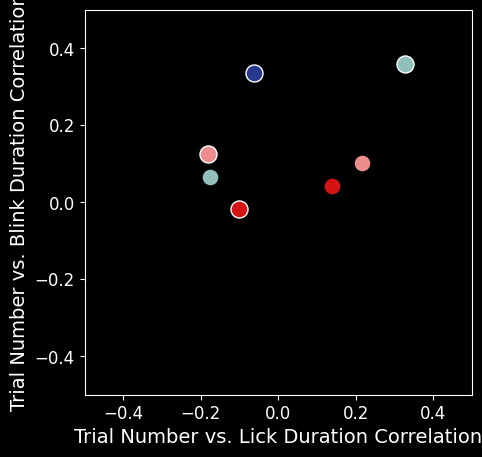

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


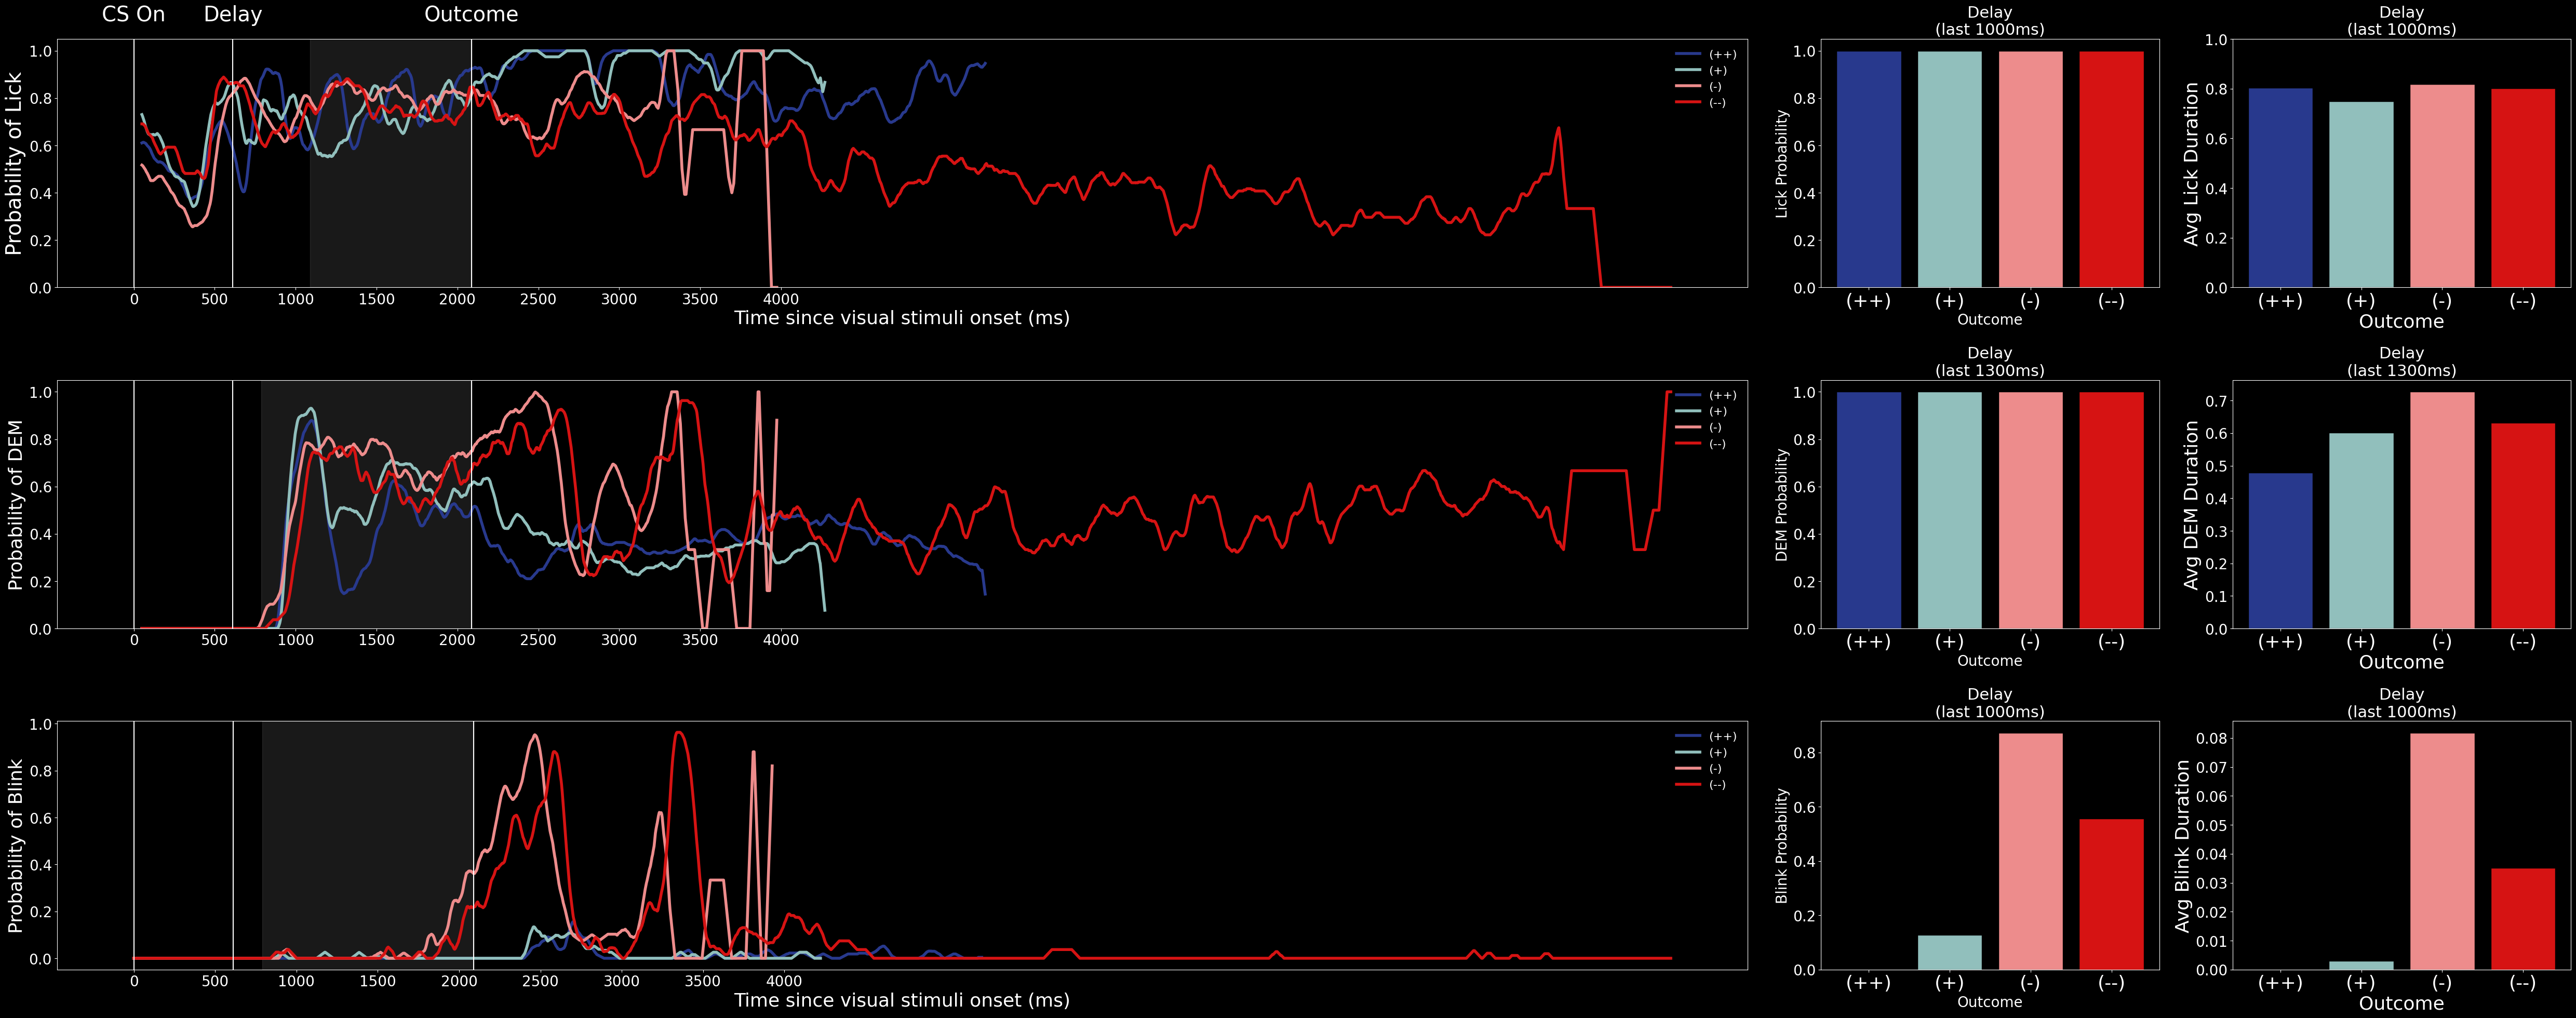

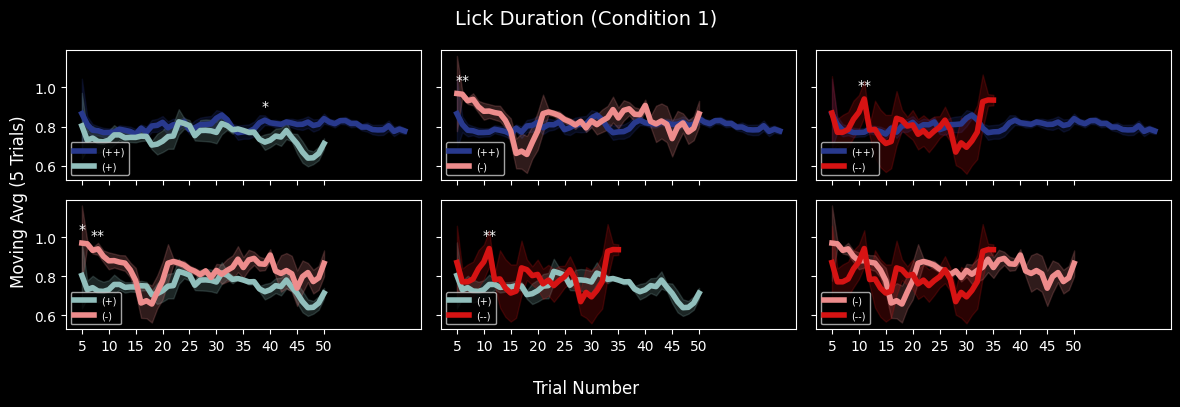

  t_test_DEM-duration_1.png saved.


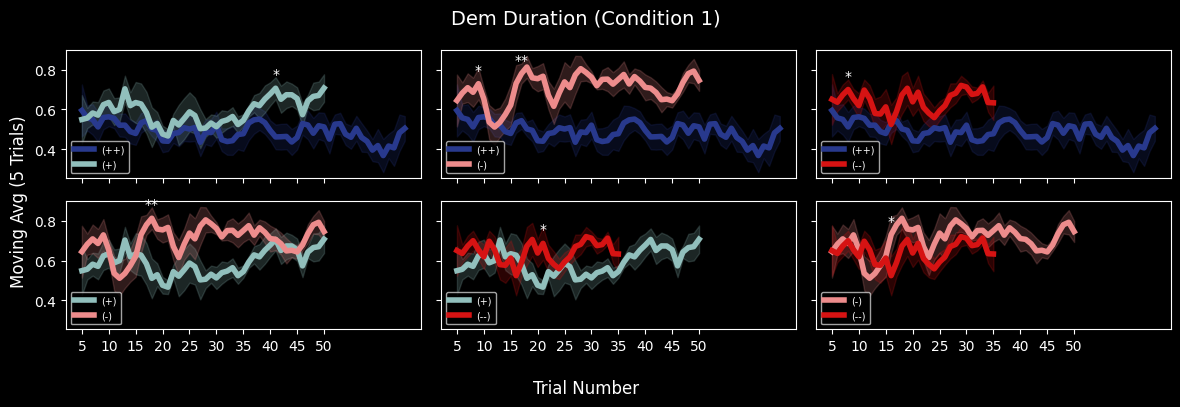

  t_test_blink-duration_1.png saved.


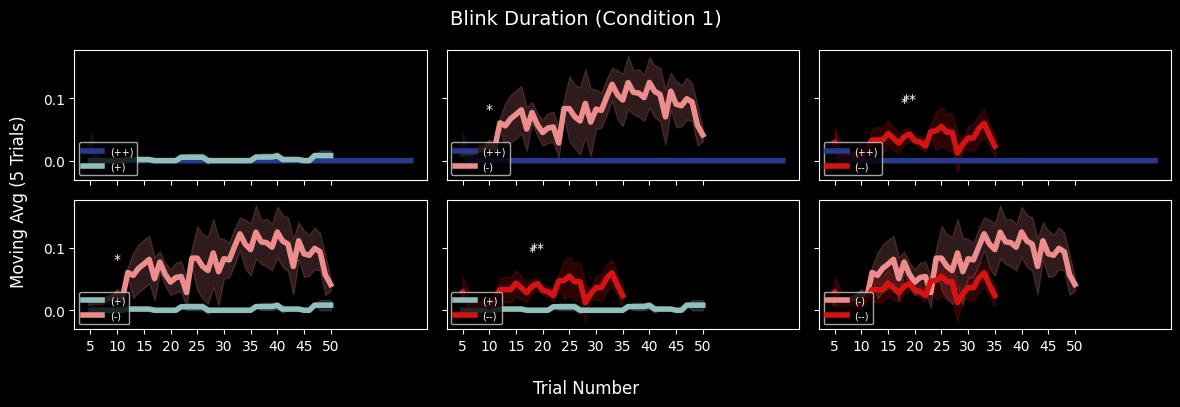

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


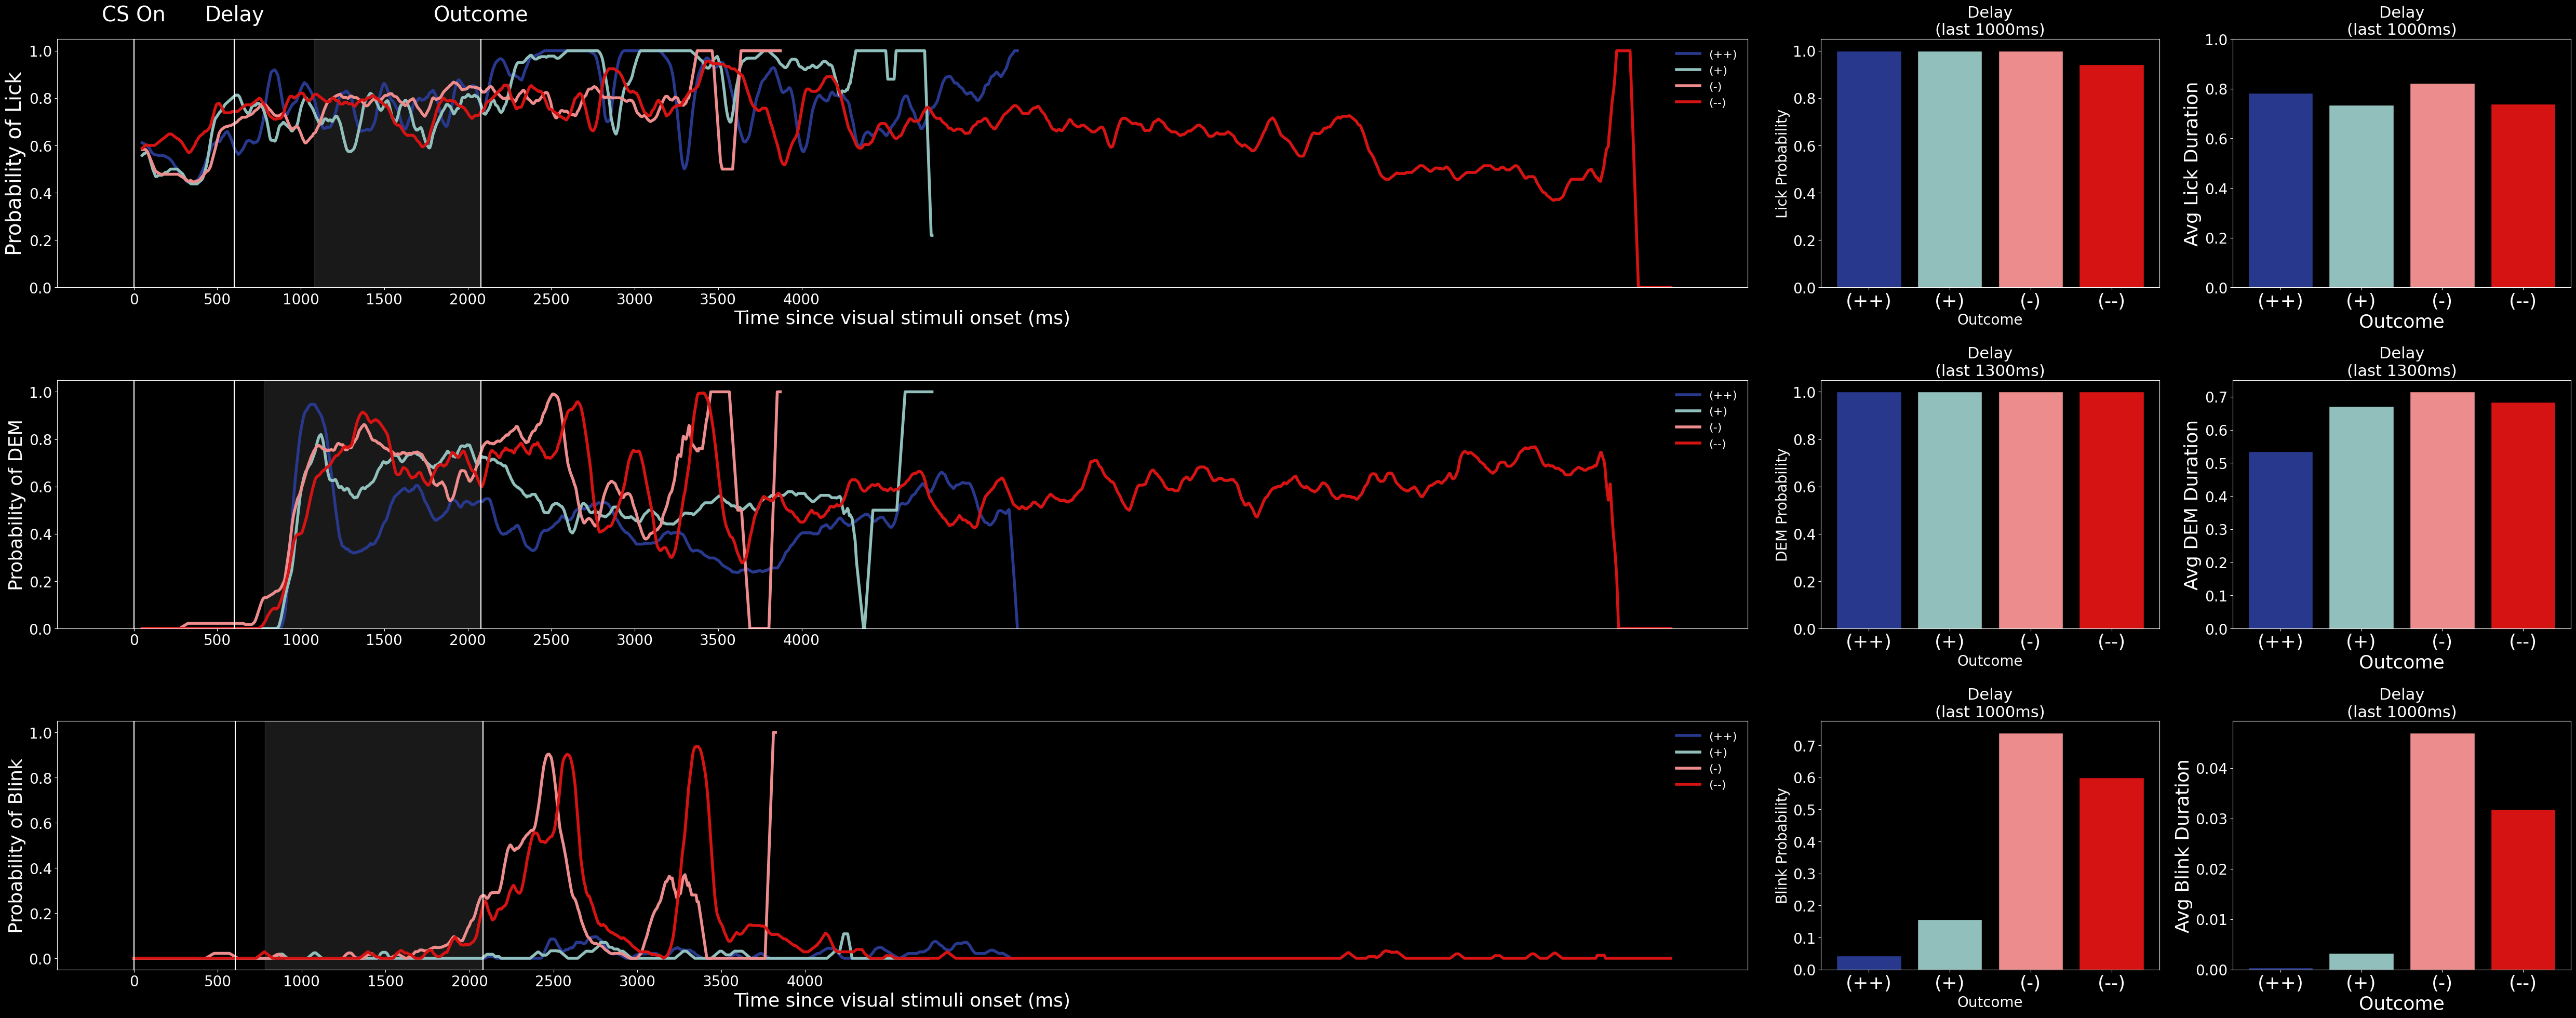

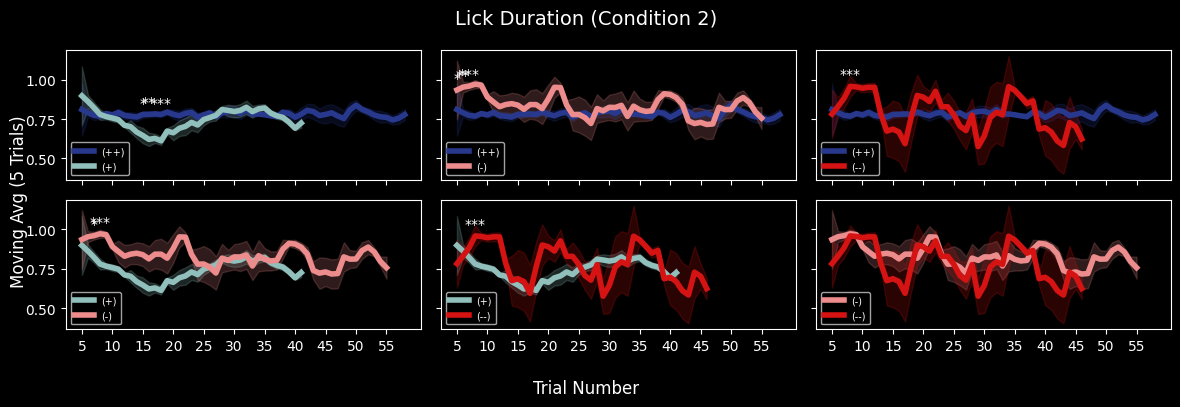

  t_test_DEM-duration_2.png saved.


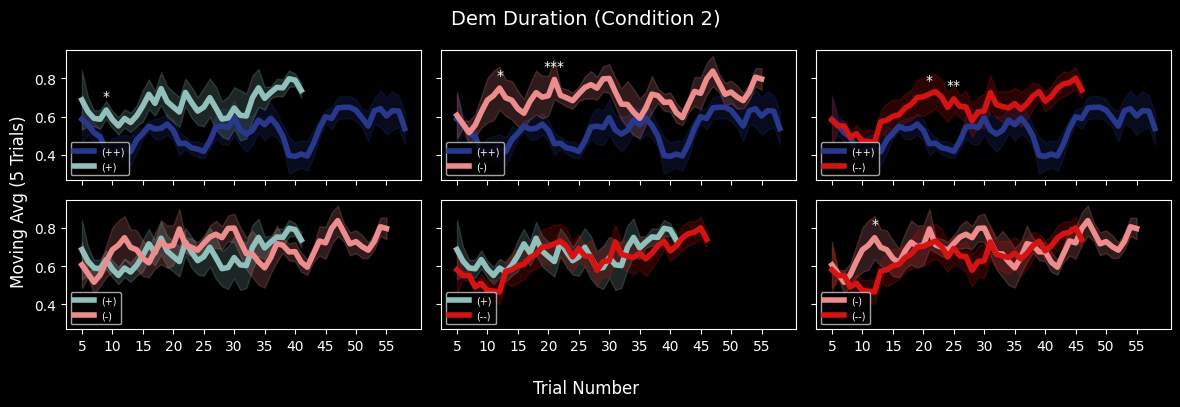

  t_test_blink-duration_2.png saved.


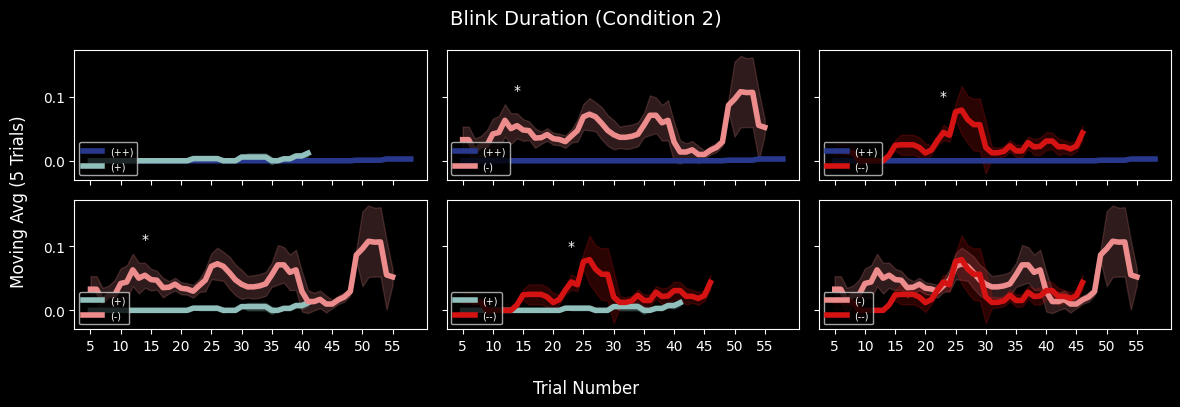

 [0.0, 0.5, 1.0] ANOVA 2.016 | P-value: 1.35E-01
  (0, 1) T-value: 2.005 P-value: 4.66E-02 |  Z-value: 1.601 P-value: 1.09E-01
    0 Lick Mean: 0.797 Lick Std: 0.196 Trials: 110
    1 Lick Mean: 0.752 Lick Std: 0.093 Trials: 53
  (0, 2) T-value: 0.036 P-value: 9.71E-01 |  Z-value: 0.031 P-value: 9.75E-01
    0 Lick Mean: 0.797 Lick Std: 0.196 Trials: 110
    2 Lick Mean: 0.796 Lick Std: 0.064 Trials: 77
  (1, 2) T-value: -3.028 P-value: 3.26E-03 |  Z-value: -3.24 P-value: 1.20E-03
    1 Lick Mean: 0.752 Lick Std: 0.093 Trials: 53
    2 Lick Mean: 0.796 Lick Std: 0.064 Trials: 77
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 23.101 | P-value: 6.83E-10
  (0, 1) T-value: -6.797 P-value: 2.57E-10 |  Z-value: -6.489 P-value: 8.65E-11
    0 DEM Mean: 0.558 DEM Std: 0.17 Trials: 130
    1 DEM Mean: 0.72 DEM Std: 0.147 Trials: 65
  (0, 2) T-value: -3.669 P-value: 4.21E-04 |  Z-value: -3.455 P-value: 5.50E-04
    0 DEM Mean: 0.558 DEM Std: 0.17 Trials: 130
    2 DEM Mean: 0.658 DEM Std: 0.149 

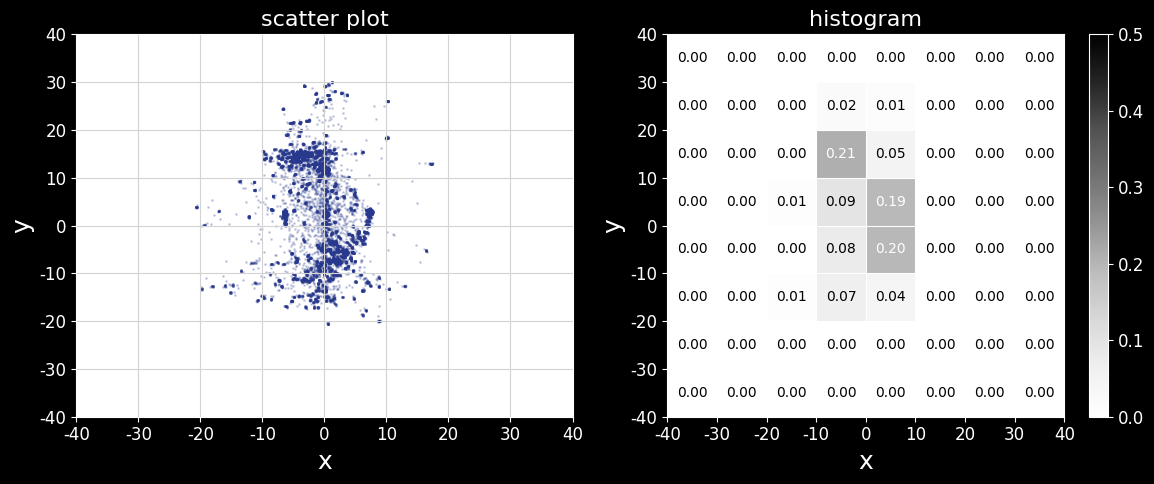

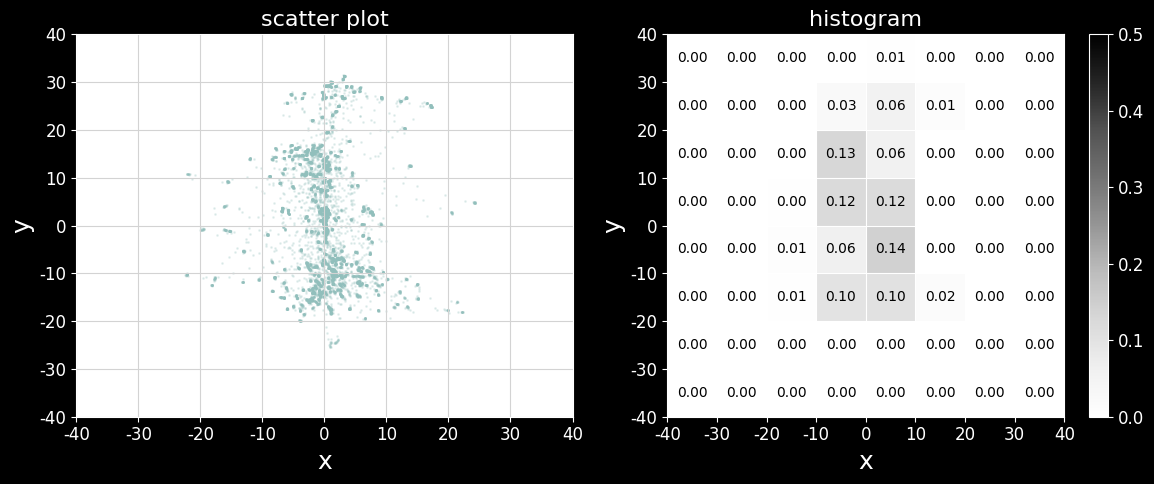

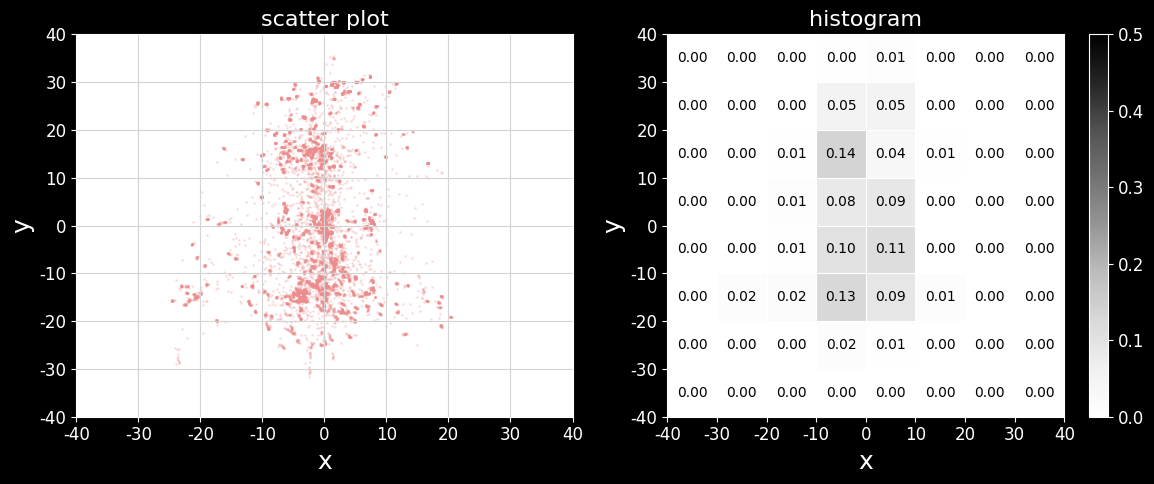

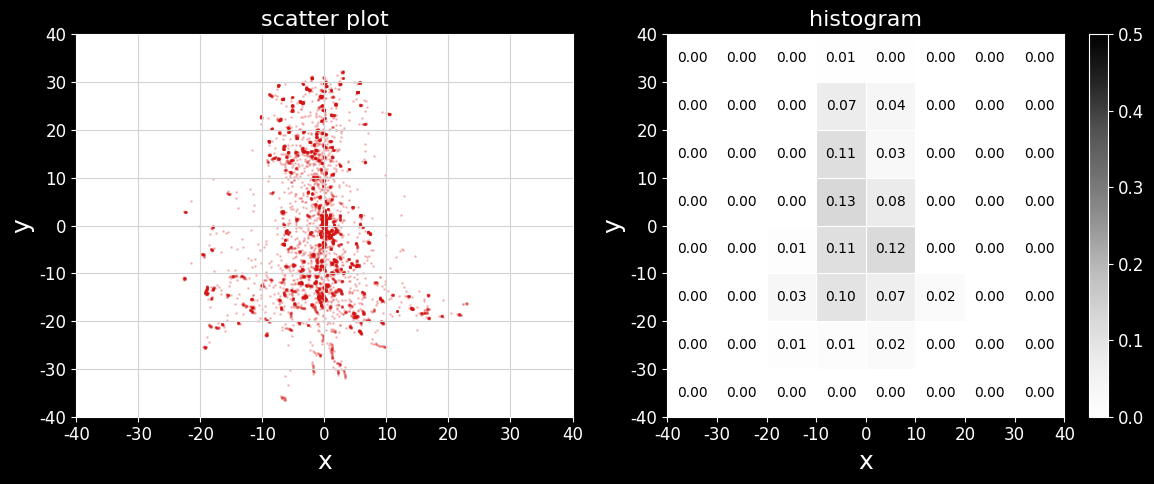

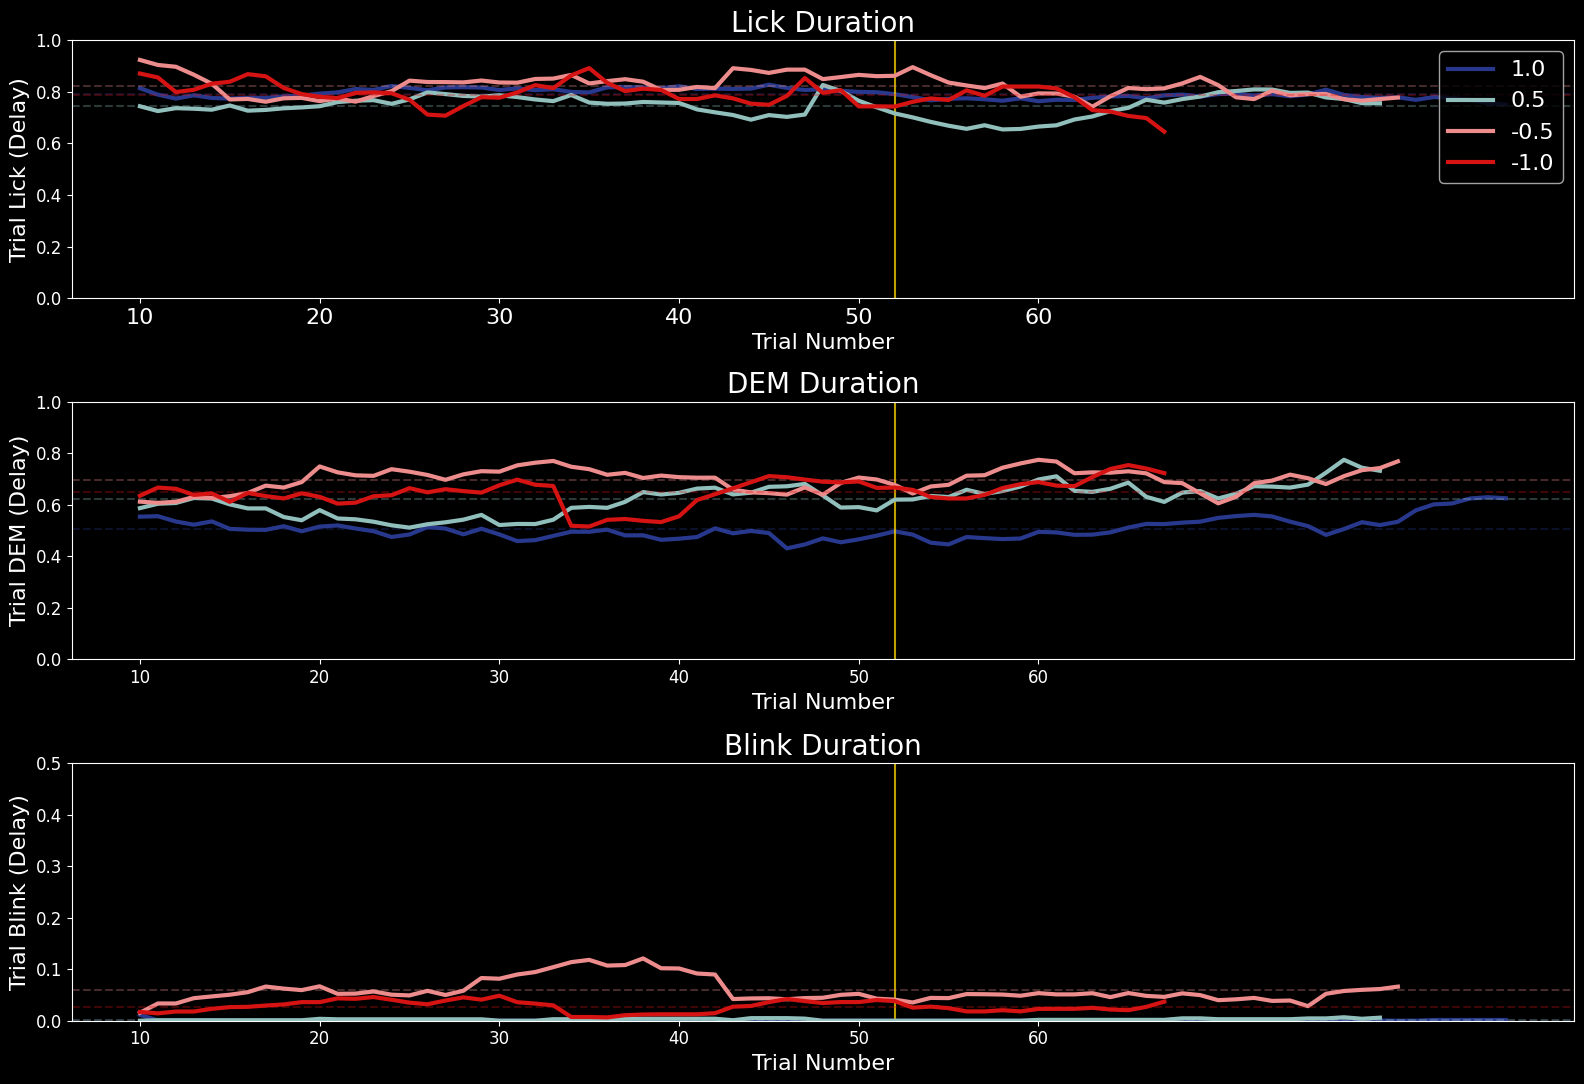

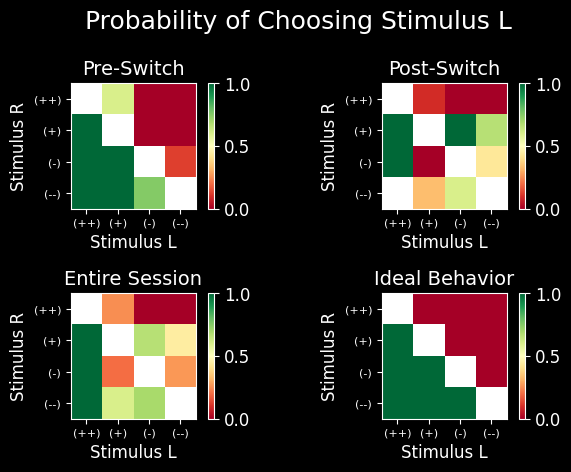

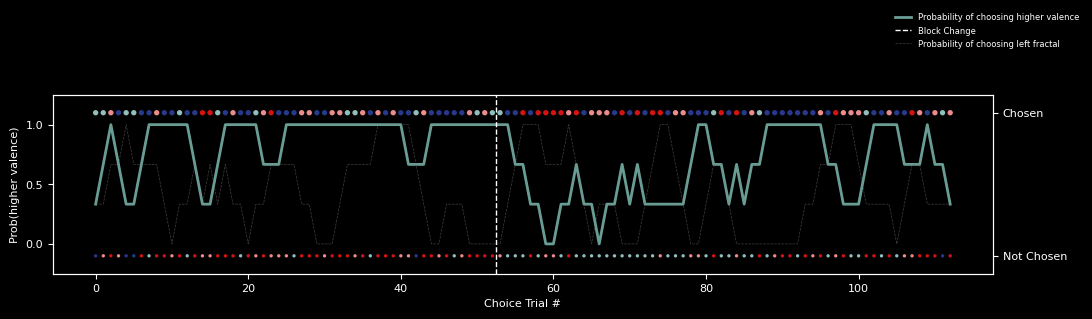

Reward vs. Airpuff Accuracy: 0.76 (+/- 0.20)
  lick_duration: -1.049
  blink_duration_offscreen: -0.613
  pupil_raster_window_avg: -0.269
  blink_duration_window: -0.582
  eye_distance: -0.018


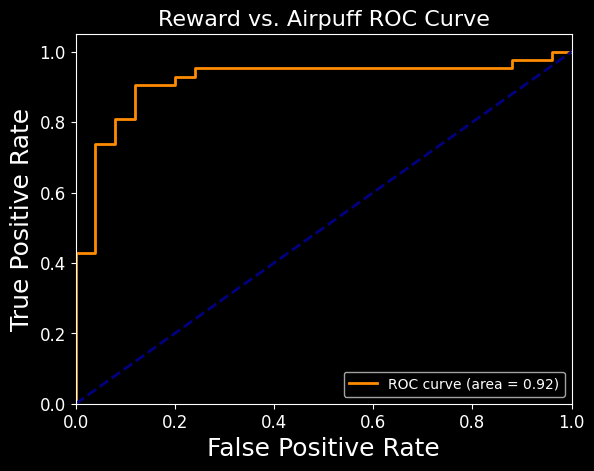

Large Reward vs. Small Reward Accuracy: 0.63 (+/- 0.23)
  lick_duration: 0.151
  blink_duration_offscreen: -0.22
  pupil_raster_window_avg: 0.0
  blink_duration_window: 0.001
  eye_distance: -0.033


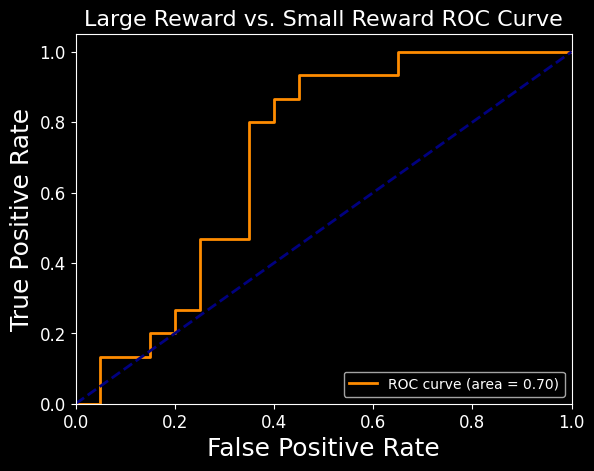

Large Airpuff vs. Small Airpuff Accuracy: 0.45 (+/- 0.30)
  lick_duration: -0.426
  blink_duration_offscreen: -0.321
  pupil_raster_window_avg: -0.058
  blink_duration_window: -0.117
  eye_distance: 0.0


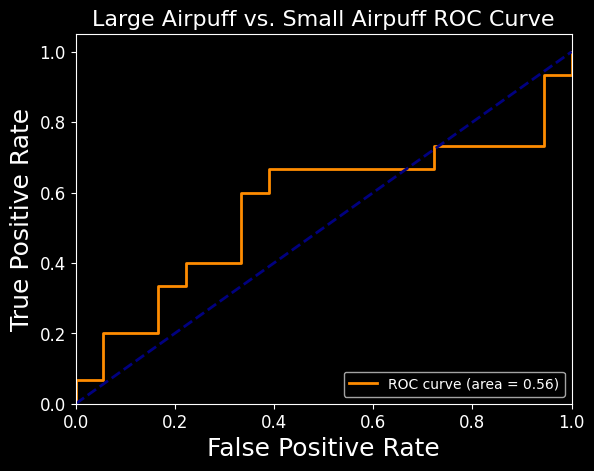


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20231101_bear.md
Writing to excel...
  Writing 231101 to Emotion_Tracker.xlsx


In [13]:
plt.style.use('dark_background')

from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	print(date)
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [14]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.658 (287/436)
   Valence 1.0: 1.0 (73/73)
   Valence 0.5: 0.841 (74/88)
   Valence -0.5: 0.623 (76/122)
   Valence -1.0: 0.418 (64/153)
 Percent successful choice trials: 0.123 (113/920)
   Valence Pair [-1.0, -0.5]: 0.265 (30/113)
   Valence Pair [-0.5, 0.5]: 0.179 (12/67)
   Valence Pair [-1.0, 0.5]: 0.176 (16/91)
   Valence Pair [0.5, 1.0]: 0.11 (26/236)
   Valence Pair [-1.0, 1.0]: 0.071 (15/212)
   Valence Pair [-0.5, 1.0]: 0.07 (14/201)
 Percent left choice trials: 0.434 (49/113)
 Percent higher valence choice trials: 0.735 (83/113)
   Valence Pair [-0.5, 1.0]: 1.0 (14/14)
   Valence Pair [-1.0, 1.0]: 1.0 (15/15)
   Valence Pair [0.5, 1.0]: 0.808 (21/26)
   Valence Pair [-1.0, -0.5]: 0.7 (21/30)
   Valence Pair [-1.0, 0.5]: 0.5 (8/16)
   Valence Pair [-0.5, 0.5]: 0.333 (4/12)


Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 558.294
   Valence Not Chosen: -0.5 636.667 (9)
   Valence Not Chosen: 0.5 47

In [10]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
valence                                                                     
-1.0          0.872197                  0.514359                 0.092657  \
-0.5          0.813984                  0.476813                 0.087314   
 0.0          0.803029                  0.594118                 0.117964   
 0.5          0.958574                  0.293971                 0.030317   
 1.0          0.998323                  0.511964                 0.045290   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.133345     71.782175  
-0.5                  0.138413     75.460576  
 0.0                  0.157579     64.083207  
 0.5                  0.071934     69.556981  
 1.0                  0.065834     50.352084

In [11]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
11       1       -1.0       -0.5     -0.5               1
12       1        0.5       -0.5      0.5               1
17       1        0.0        0.5      0.5               1
21       1        0.5       -1.0      0.5               1
25       1       -0.5       -1.0     -0.5               1
30       1        0.5        1.0      1.0               1
34       1        0.5        1.0      1.0               1
38       1       -0.5        0.5     -0.5               0
41       1       -0.5       -1.0     -1.0               0
44       1        0.0        0.5      0.5               1
53       1        0.5       -1.0     -1.0               0
54       1       -1.0       -0.5     -1.0               0
58       1       -1.0        0.5      0.5               1
59       1       -0.5       -1.0     -0.5               1
60       1       -1.0        1.0      1.0               1
68       1       -0.5       -1.0     -1.0               0
78       1       -1.0        0.0     -1.0               0
81       1       -1.0        1.0      1.0               1
91       1        1.0        0.5      1.0               1
98       1        0.5        1.0      1.0               1
104      1       -0.5        0.0      0.0               1
106      1        1.0        0.0      1.0               1
113      1       -1.0        0.0     -1.0               0
116      1       -0.5       -1.0     -0.5               1
125      1        0.5        1.0      1.0               1
138      1        1.0       -1.0      1.0               1
139      1       -0.5        0.0      0.0               1
141      1        1.0        0.5      1.0               1
143      1        0.5        1.0      1.0               1
159      1       -0.5        0.0      0.0               1
164      1        1.0        0.5      1.0               1
167      1        1.0        0.5      1.0               1
175      1        0.5        0.0      0.5               1
178      1       -0.5       -1.0     -1.0               0
186      1       -1.0        0.5      0.5               1
187      1        0.5        1.0      1.0               1
201      1        0.0        0.5      0.5               1
207      1       -1.0       -0.5     -0.5               1
208      1        0.5        0.0      0.5               1
209      1       -1.0        0.0      0.0               1
219      1        1.0        0.5      1.0               1
223      1        1.0       -0.5      1.0               1
225      1       -1.0        1.0      1.0               1
226      1        1.0        0.5      1.0               1
241      1       -1.0        0.0     -1.0               0
242      1        0.5        0.0      0.5               1
243      1        1.0       -1.0      1.0               1
248      1       -1.0        1.0      1.0               1
251      1        0.5        1.0      1.0               1
254      1        0.5       -0.5      0.5               1
259      1       -0.5        1.0      1.0               1
262      1        1.0       -0.5      1.0               1
265      1       -0.5        0.5      0.5               1
273      1        1.0        0.0      1.0               1
275      1        0.0       -0.5      0.0               1
278      2       -0.5       -1.0     -0.5               1
286      2        0.5        0.0      0.0               0
289      2       -1.0        0.5     -1.0               0
295      2       -0.5        1.0      1.0               1
305      2       -0.5       -1.0     -1.0               0
308      2       -0.5       -1.0     -1.0               0
310      2        1.0        0.0      1.0               1
312      2        1.0        0.5      1.0               1
329      2       -0.5       -1.0     -1.0               0
338      2        0.0        0.5      0.5               1
344      2       -1.0        0.5      0.5               1
346      2        0.0        1.0      1.0               1
354      2        1.0        0.5      1.0               1
357

In [10]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration   
condition fractal_chosen                                                   
1         _fractal_A          1.0               18.571429       0.735714  \
          _fractal_B          0.5               22.468750       0.700906   
          _fractal_C         -0.5               21.848485       0.648364   
          _fractal_D         -1.0               22.793103       0.638207   
          _fractal_E          0.0               10.428571       0.733571   
2         _fractal_A         -0.5               26.742857       0.544200   
          _fractal_B         -1.0               20.424242       0.621727   
          _fractal_C          1.0               27.131579       0.715447   
          _fractal_D          0.5               21.710526       0.700026   
          _fractal_E          0.0               10.470588       0.560471   

                          blink_duration_offscreen  pupil_raster_window_avg   
condition fractal_chosen                                                      
1         _fractal_A                      0.505440                 0.000000  \
          _fractal_B                      0.571442                 0.004423   
          _fractal_C                      0.646224                 0.018438   
          _fractal_D                      0.677082                 0.057745   
          _fractal_E                      0.633132                 0.031538   
2         _fractal_A                      0.705560                 0.025099   
          _fractal_B                      0.692797                 0.022937   
          _fractal_C                      0.606903                 0.002024   
          _fractal_D                      0.599413                 0.000749   
          _fractal_E                      0.732760                 0.020045   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.000000    105.440940  
          _fractal_B                   0.016995    140.463855  
          _fractal_C                   0.070606    171.050488  
          _fractal_D                   0.121724    223.525084  
          _fractal_E                   0.091099    198.956141  
2         _fractal_A                   0.069407    190.057751  
          _fractal_B                   0.060839    190.519398  
          _fractal_C                   0.011964    134.766998  
          _fractal_D                   0.004474    104.952688  
          _fractal_E                   0.068416    183.936939

### Behavioral Summary Panels by Valence

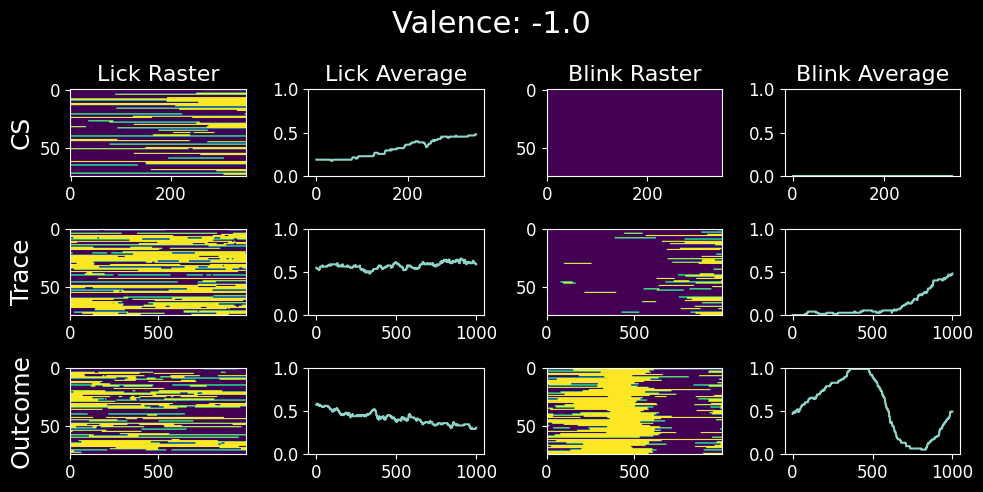

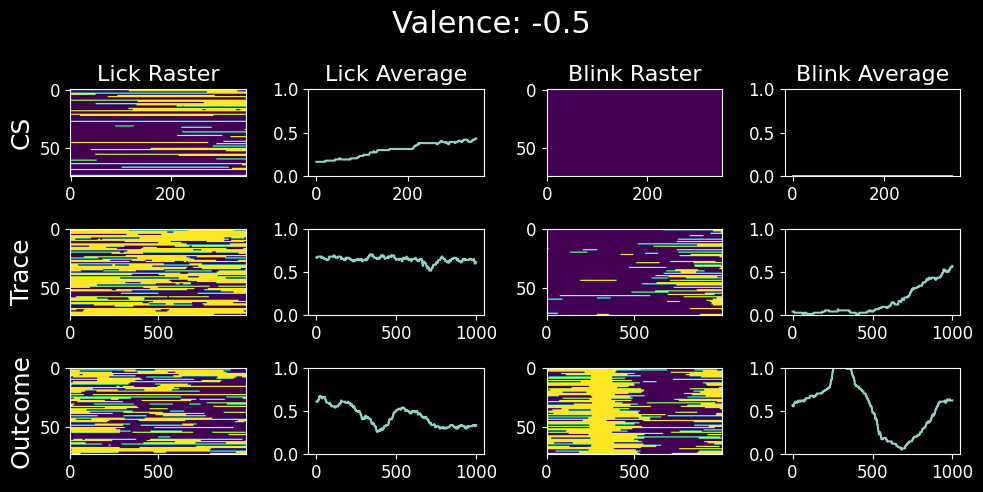

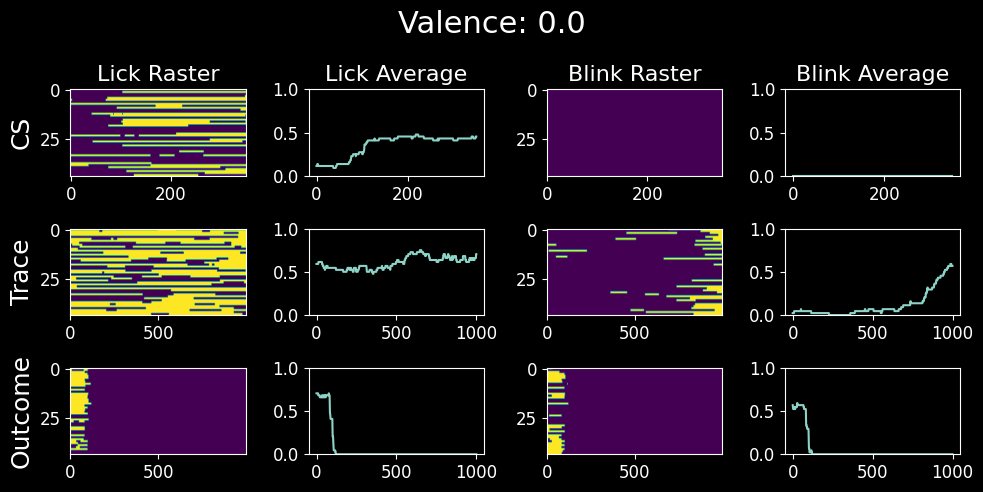

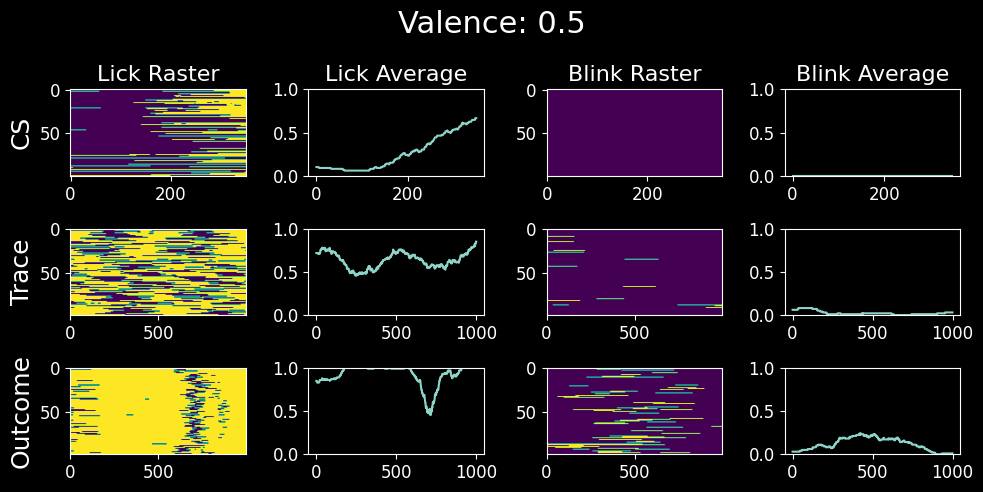

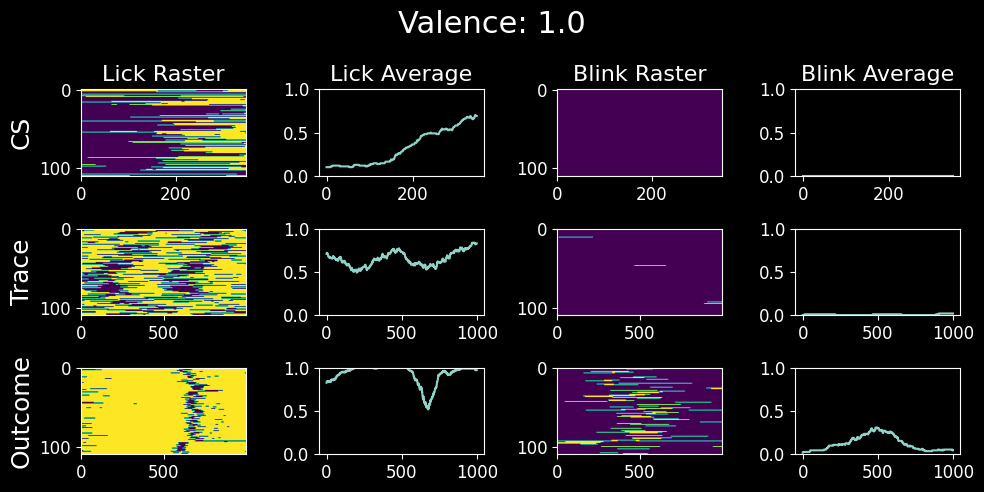

In [7]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [51]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 30) &
											 (session_df_correct['lick_duration'] > 0.8)]\
			[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
124  231020        125      1.0          0.863                  0.759231  \
153  231020        154     -1.0          0.915                  0.434615   
320  231020        321      0.5          0.847                  0.326923   
327  231020        328     -1.0          0.845                  0.000000   
368  231020        369      0.5          0.826                  0.000000   
420  231020        421      1.0          1.000                  0.644615   
429  231020        430     -0.5          0.839                  0.000000   
434  231020        435      0.5          0.883                  0.000000   
450  231020        451     -0.5          1.000                  0.000000   
473  231020        474      1.0          1.000                  0.368462   
476  231020        477      0.5          0.948                  0.000000   
491  231020        492     -1.0          0.867                  0.000000   
499  231020        500      0.5          1.000                  0.231538   
511  231020        512      1.0          1.000                  0.000000   
526  231020        527      1.0          1.000                  0.329231   
531  231020        532      0.0          0.854                  0.000000   
537  231020        538      1.0          1.000                  0.000000   

     eye_distance  
124     17.867696  
153     29.642553  
320     18.850545  
327      8.734987  
368     18.021601  
420     28.904664  
429     10.428049  
434     26.122422  
450     11.858479  
473     23.658623  
476     25.909921  
491      7.737253  
499     27.212344  
511     26.936698  
526     28.035527  
531      8.183307  
537     27.212786

### High DEM + Blink + Eye Movement / Low Lick Trials

In [52]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.25) &
											 (session_df_correct['eye_distance'] > 200) & 
											 (session_df_correct['lick_duration'] < 0.75)]\
		[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
336  231020        337     -1.0          0.500                  0.623846  \
492  231020        493     -1.0          0.474                  0.260769   

     eye_distance  
336    265.434075  
492    556.544455

In [13]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.107
Lick vs. Blink Correlation 0.007
DEM vs. Blink Correlation 0.318
Pupil 0 vs. Blink Correlation 0.949


***
### Video Test

In [31]:
trial_specified = 27
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
26                    0     -0.5     _fractal_C         0.0          0.5  \

    lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
26          0.499                  0.118462                      0.0  \

    blink_duration_window  
26                    0.0

***
## Single Trial Analysis

In [33]:
trial_selected = 15
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
  									 'valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence  lick_duration  blink_duration_sig   
14        1      1.0           0.85            0.342308  \

    blink_duration_offscreen  pupil_raster_window_avg  blink_duration_window   
14                  0.586923                 0.342308               0.521538  \

    eye_distance Outcome Start Reward Trigger Airpuff Trigger  
14     92.016822          4543           4550            <NA>

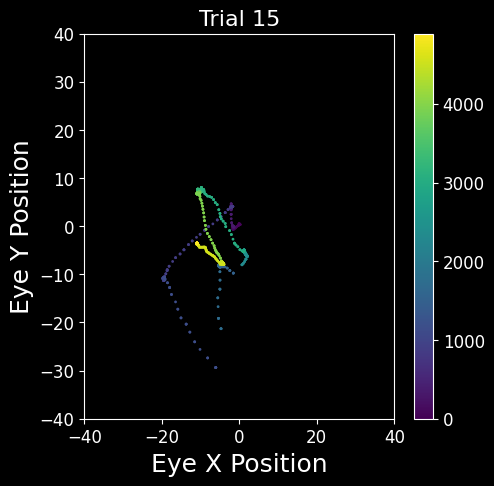

In [34]:
def plot_eye_single_trial(session_df, trial_num):
  # 3 figures, where the left one is twice as tall as the other two
  f, axarr = plt.subplots(1, 1, figsize=(5, 5))
  trial = session_df[session_df['trial_num'] == trial_num]
  trial_fix_off = trial['Fixation Off'].iloc[0]
  trial_eye_x = trial['eye_x'].tolist()[0][trial_fix_off:]
  trial_eye_y = trial['eye_y'].tolist()[0][trial_fix_off:]
  # show heat map
  plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
  plt.colorbar()
  plt.xlim(-40, 40)
  plt.ylim(-40, 40)
  plt.title(f'Trial {trial_num}')
  plt.xlabel('Eye X Position')
  plt.ylabel('Eye Y Position')
  plt.show()

plot_eye_single_trial(session_df, trial_selected)

Total Eye Positions: 1500
Histogram Positions: 1055
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0095 0.0104 0.2085 0.49   0.     0.     0.    ]
 [0.     0.0076 0.2512 0.0227 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 30.14%
outside x,y [-40, 40]: 29.67%
  eye_heatmap_1.0.png saved.


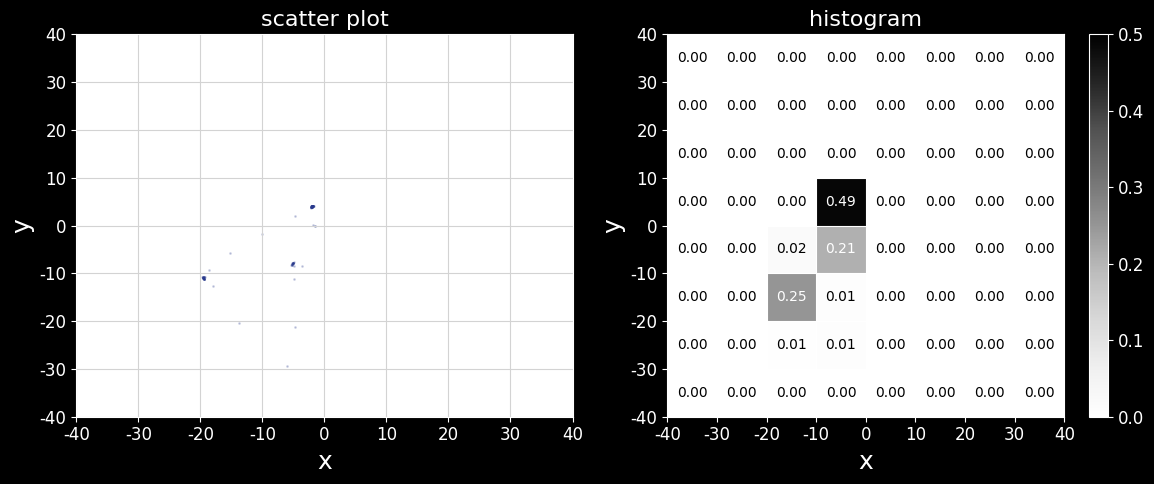

In [35]:
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode',
  4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
          'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [100]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
          'session_obj': session_obj, 
          'trial_start': 0,
          'trial_end': len(session_obj.df),
          'epoch_start': 'Trace Start', 
          'epoch_end': 'Outcome Start', 
          'thread_flag': True}

parse_wm_videos(**kwargs)

Parsing Trials for Videos: 0 - 1176
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 0    | Frames: 368-547
  Video complete: Cam: e3v8360 | Trial: 227  | Frames: 9066-9245
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 65   | Frames: 46190-46367
  Video complete: Cam: e3v8360 | Trial: 257  | Frames: 32736-32915
  Video complete: Cam: e3v8360 | Trial: 3    | Frames: 3533-3711
  Video complete: Cam: e3v8360 | Trial: 1    | Frames: 1529-1706
  Video complete: Cam: e3v8360 | Trial: 215  | Frames: 25-203
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 427  | Frames: 4125-4303
  Video complete: Cam: e3v8360 | Trial: 97   | Frames: 67457-67636
  Video complete: Cam: e3v8360 | Trial: 118  | Frames: 81274-81452
  Video complete: Cam: e3v8360 | Trial: 641  | Frames: 808-987
  Video complete: Cam: e3v8360 | Trial

## Generate MonkeyLogic Behavior Trial Videos


In [19]:
from config.ml_videos import generate_ml_behavior_videos
trial_selected = 27 
generate_ml_behavior_videos(session_df, session_obj, trial_selected)

Generating video for trial 27
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/eye_0027.mp4


Trial 27 eye:   0%|          | 0/1507 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/lick_0027.mp4


Trial 27 lick:   0%|          | 0/1507 [00:00<?, ?it/s]

***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [ ]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

In [ ]:
for key in dlc_video_path_dict.keys():
   video_path_list = dlc_video_path_dict[key]
   video_list_subset = video_path_list[:]
   config_path = config_path_dict[key]
   # Adding new videos to the config.yaml file
   deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
               coords=None, extract_frames=False
   )

   # Analyze specified videos
   deeplabcut.analyze_videos(config_path, video_list_subset, 
               videotype, save_as_csv=True
   )

   # Filter predictions
   deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

   # Create labeled videos
   deeplabcut.create_labeled_video(
      config_path, video_list_subset, 
      videotype, 
      draw_skeleton=True, 
      filtered=True,
      trailpoints=5,
   )

   # Plot trajectories
   deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [ ]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
  dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')